# Ladder Graph

In [1]:
print(__doc__)

import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Random forest
from sklearn.ensemble import RandomForestClassifier
# Feature importance by random forest
from sklearn.ensemble import ExtraTreesClassifier


# Hierarchy cluster
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


from efficient_apriori import apriori

Automatically created module for IPython interactive environment


* 在數位電路理論中，序向邏輯電路是指電路任何時刻的穩態輸出不僅取決於當前的輸入，還與前一時刻輸入形成的狀態有關。這跟組合邏輯電路相反，組合邏輯的輸出只會跟目前的輸入成一種函數關係。換句話說，時序邏輯擁有儲存元件（記憶體）來存儲信息，而組合邏輯則沒有。

# Data preprocessing

In [2]:
path_x = '../model_8k/data/devide_data/0918/x/'
path_y = '../model_8k/data/devide_data/0918/y/'

In [3]:
class Generating_data:
    def __init__(self, path_x, path_y):
        self.path_x = path_x
        self.path_y = path_y
    
    def train_data(self, no_y=0, file_range=10):
        
        # Training data
        for no in range(file_range): #42
            data_x = pd.read_csv(self.path_x + 'x_data_' + str(no) + '.csv', index_col=0).values
            data_y = pd.read_csv(self.path_y + 'y_data_' + str(no) + '.csv', index_col=0).values

            assert data_x.shape[0] == data_y.shape[0], "data length is different"

            train_x = np.hstack((data_x, data_y))
            train_y = data_y[:, no_y]
            yield (train_x, train_y)


    def test_data(self, no_y=0, file_range=10):
        # Testing data
        data_x = pd.read_csv(self.path_x + 'x_data_' + str(file_range) + '.csv', index_col=0).values
        data_y = pd.read_csv(self.path_y + 'y_data_' + str(file_range) + '.csv', index_col=0).values
        assert data_x.shape[0] == data_y.shape[0], "data length is different"
        return np.hstack((data_x, data_y)), data_y[:, no_y]

# Try RansomForest

In [4]:
def try_random_forest_para(train_data, test_x, test_y):
    ''' Run RandomForest: 
        return: acc, feature importance
    '''
    X, Y = train_data.__next__()
    for train_x, train_y in train_data:
        X = np.vstack((X, train_x))
        Y = np.hstack((Y, train_y))
        
    assert X.shape[0] == Y.shape[0], "Data length is different!!"
    #print("Shape of X:{}, Y:{}".format(X.shape, Y.shape))
    clf = RandomForestClassifier(n_estimators=20, 
                                 max_depth=4,
                                 random_state=0, )
    clf.fit(X, Y)
    
    
    predict = clf.predict(test_x)
    assert predict.shape[0] == test_y.shape[0], "Predict & label length is defferent"
    
    feature_importance = clf.feature_importances_
    
    acc = np.sum(np.equal(predict, test_y)) / predict.shape[0]
    return acc, feature_importance

In [5]:
g_data = Generating_data(path_x=path_x, path_y=path_y)

In [6]:
train_data = g_data.train_data(no_y=0, file_range=41)
test_x, test_y = g_data.test_data(no_y=0, file_range=41)
acc, feature_importance = try_random_forest_para(train_data, test_x, test_y)
print("Accurace: ", acc)
print("Type of feature importance {}.. with shape {}".format(
                                                      type(feature_importance), 
                                                      feature_importance.shape))

Accurace:  0.9723684210526315
Type of feature importance <class 'numpy.ndarray'>.. with shape (361,)


# Feature importance by RandomForest

In [23]:
g_data = Generating_data(path_x=path_x, path_y=path_y)

In [24]:
whole_feature_importance = np.zeros((138, 361))

for yi in range(138):
    train_data = g_data.train_data(no_y=yi, file_range=41)
    test_x, test_y = g_data.test_data(no_y=yi, file_range=41)
    acc, feature_importance = try_random_forest_para(train_data, test_x, test_y)
    print("{}th y accurace:  {} ".format(yi, acc))
    
    whole_feature_importance[yi, :] = feature_importance 

0th y accurace:  0.9723684210526315 
1th y accurace:  0.96875 
2th y accurace:  0.9292763157894737 
3th y accurace:  1.0 
4th y accurace:  1.0 
5th y accurace:  1.0 
6th y accurace:  1.0 
7th y accurace:  1.0 
8th y accurace:  0.8694078947368421 
9th y accurace:  1.0 
10th y accurace:  0.9894736842105263 
11th y accurace:  0.9921052631578947 
12th y accurace:  0.9730263157894737 
13th y accurace:  0.9980263157894737 
14th y accurace:  1.0 
15th y accurace:  0.9990131578947369 
16th y accurace:  0.9990131578947369 
17th y accurace:  1.0 
18th y accurace:  1.0 
19th y accurace:  1.0 
20th y accurace:  1.0 
21th y accurace:  1.0 
22th y accurace:  1.0 
23th y accurace:  1.0 
24th y accurace:  1.0 
25th y accurace:  1.0 
26th y accurace:  1.0 
27th y accurace:  1.0 
28th y accurace:  1.0 
29th y accurace:  1.0 
30th y accurace:  1.0 
31th y accurace:  1.0 
32th y accurace:  0.9986842105263158 
33th y accurace:  0.9986842105263158 
34th y accurace:  0.9990131578947369 
35th y accurace:  1.0

In [27]:
# 8th y accurace:  0.8694078947368421
np.savetxt("./feature_important/feature_important_RandomForest.csv", 
                           whole_feature_importance, 
                           delimiter=',',
                           fmt='%s')


# Flow
* Feature Important
* Hierarchy Cluster
* Association Rule

# Hierarchy Cluster

In [15]:
read_file_path = "./feature_important/feature_important_RandomForest.csv"
read_whole_feature_importance = pd.read_csv(read_file_path,
                                            header=None,
                                            index_col=None,).values #
print(resd_whole_feature_importance.shape)

(138, 361)


In [18]:
''' Parameters：
'ward', 'single', 'complete', 'average'。
'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', 'cosine'
'''
HCluster_result = hierarchy.linkage(read_whole_feature_importance, 'ward')
Cophenetic_Coefficient, coph_dists = cophenet(HCluster_result, pdist(resd_whole_feature_importance))
print("Cophenetic_Coefficient : ", Cophenetic_Coefficient)

Cophenetic_Coefficient :  0.5876246595900977


In [21]:
print("Result format:[index 1, index 2, distance, sample_count].")
HCluster_result

Result format:[index 1, index 2, distance, sample_count].


array([[3.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 1.38000000e+02, 0.00000000e+00, 3.00000000e+00],
       [6.00000000e+00, 1.39000000e+02, 0.00000000e+00, 4.00000000e+00],
       [7.00000000e+00, 1.40000000e+02, 0.00000000e+00, 5.00000000e+00],
       [9.00000000e+00, 1.41000000e+02, 0.00000000e+00, 6.00000000e+00],
       [1.40000000e+01, 1.42000000e+02, 0.00000000e+00, 7.00000000e+00],
       [1.70000000e+01, 1.43000000e+02, 0.00000000e+00, 8.00000000e+00],
       [1.80000000e+01, 1.44000000e+02, 0.00000000e+00, 9.00000000e+00],
       [1.90000000e+01, 1.45000000e+02, 0.00000000e+00, 1.00000000e+01],
       [2.00000000e+01, 1.46000000e+02, 0.00000000e+00, 1.10000000e+01],
       [2.10000000e+01, 1.47000000e+02, 0.00000000e+00, 1.20000000e+01],
       [2.20000000e+01, 1.48000000e+02, 0.00000000e+00, 1.30000000e+01],
       [2.30000000e+01, 1.49000000e+02, 0.00000000e+00, 1.40000000e+01],
       [2.40000000e+01, 1.50000000e+02, 0.00000000e

<Figure size 4320x2160 with 0 Axes>

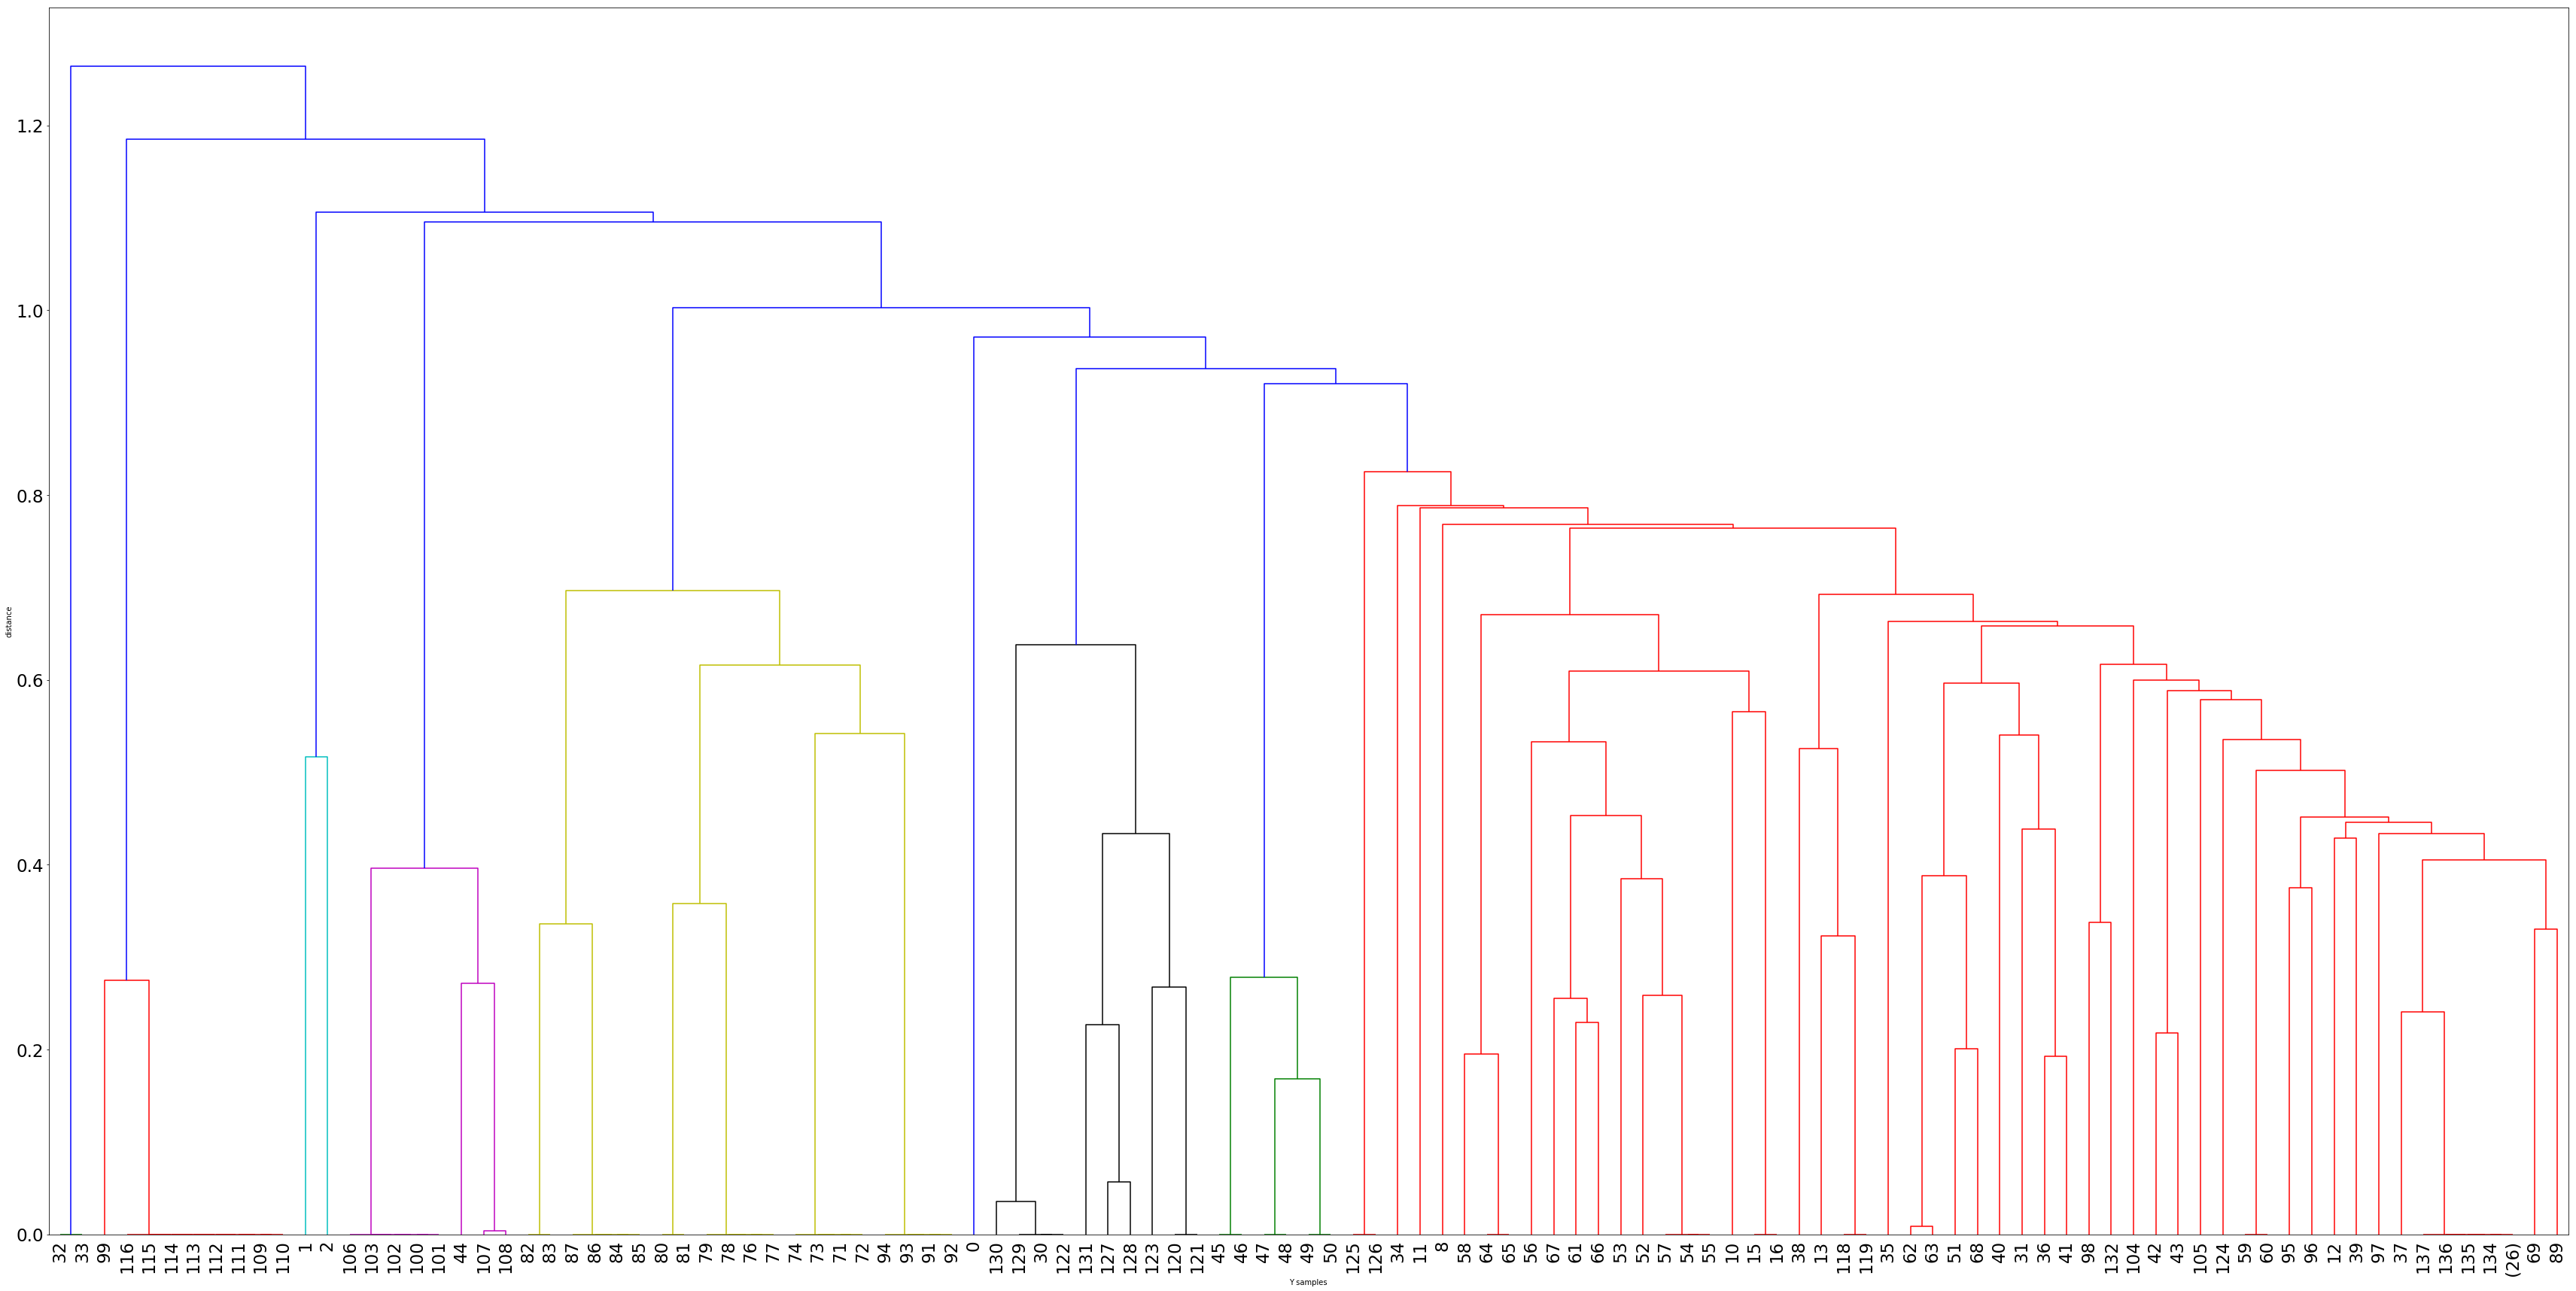

In [22]:
plt.figure( figsize=(60,30))
ax = plt.subplots(figsize=(60,30))
dn = hierarchy.dendrogram(HCluster_result, truncate_mode='level')
plt.tick_params(labelsize=23)
plt.ylabel('distance')
plt.xlabel('Y samples')

plt.savefig("plot_ward.png")

# Apriori algorithm Only Y
* Support: 一起出現次數/資料筆數
* Confidence: 前提發生情況下, 後項發生機率
* Lift: 信賴度 / 後項單獨發生機率

In [23]:
def label_to_dynamic_change_index(upper_file_number):
    dynamic_change_y_index = []
    for no in range(upper_file_number): # max is 42
        data_y = pd.read_csv(path_y + 'y_data_' + str(no) + '.csv', index_col=0).values
        
        shape_y = data_y.shape
        
        batch_dynamic_change_y = np.abs(data_y[1:] - data_y[:-1])
        
        for raw in batch_dynamic_change_y:
            if np.sum(raw) != 0:
                dynamic_change_y_index.append( np.where(raw == 1)[0][:].tolist())
    return dynamic_change_y_index

In [24]:
dynamic_change_y_index = label_to_dynamic_change_index(42)
itemsets, rules = apriori(dynamic_change_y_index, min_support=0.005,  min_confidence=0.5)
len(dynamic_change_y_index)

96214

In [25]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule) 

{1, 31} -> {2} (conf: 0.548, supp: 0.009, lift: 3.917, conv: 1.903)
{16, 31} -> {15} (conf: 1.000, supp: 0.005, lift: 26.202, conv: 961835075.976)
{15, 31} -> {16} (conf: 1.000, supp: 0.005, lift: 26.202, conv: 961835075.976)
{16, 51} -> {15} (conf: 1.000, supp: 0.005, lift: 26.202, conv: 961835075.976)
{15, 51} -> {16} (conf: 1.000, supp: 0.005, lift: 26.202, conv: 961835075.976)
{10, 16} -> {15} (conf: 1.000, supp: 0.006, lift: 26.202, conv: 961835075.976)
{10, 15} -> {16} (conf: 1.000, supp: 0.006, lift: 26.202, conv: 961835075.976)
{109, 110} -> {107} (conf: 0.500, supp: 0.006, lift: 39.529, conv: 1.976)
{109, 111} -> {107} (conf: 0.500, supp: 0.006, lift: 39.529, conv: 1.976)
{109, 112} -> {107} (conf: 0.500, supp: 0.006, lift: 39.529, conv: 1.976)
{109, 113} -> {107} (conf: 0.500, supp: 0.006, lift: 39.529, conv: 1.976)
{109, 114} -> {107} (conf: 0.500, supp: 0.006, lift: 39.529, conv: 1.976)
{109, 115} -> {107} (conf: 0.500, supp: 0.006, lift: 39.529, conv: 1.976)
{109, 116} -> 

{71, 91} -> {87} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{71, 92} -> {87} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{71, 93} -> {87} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{71, 94} -> {87} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 91} -> {84} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 92} -> {84} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 93} -> {84} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 94} -> {84} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 91} -> {85} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 92} -> {85} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 93} -> {85} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 94} -> {85} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 91} -> {86} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 92} -> {86} (conf: 0.843, supp: 0.008, lift: 67.235, conv: 6.280)
{72, 9

{72, 87} -> {86} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 86} -> {87} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 92} -> {91} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 91} -> {92} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 93} -> {91} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 91} -> {93} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 94} -> {91} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 91} -> {94} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 93} -> {92} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 92} -> {93} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 94} -> {92} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 92} -> {94} (conf: 1.000, supp: 0.010, lift: 79.779, conv: 987465441.620)
{72, 94} -> {93} (conf: 1.000, supp: 0.010, lift: 79

In [38]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule) 

tuple

# 

In [29]:
resd_whole_feature_importance[:, 223:].shape

(138, 138)

In [30]:
def make_dict_for_number_to_xy_title():
    columns_x = pd.read_csv(path_x + 'x_data_' + str(0) + '.csv', index_col=0).columns
    columns_y = pd.read_csv(path_y + 'y_data_' + str(0) + '.csv', index_col=0).columns
    
    xy_columns = np.hstack((columns_x, columns_y))
    
    index_column_name_dict = {}
    for index, column_name in enumerate(xy_columns):
        index_column_name_dict[index] = column_name
    return index_column_name_dict

In [ ]:
# Rule 